### Ali Darabi - 810100264
### Hesam Ramezanian - 810100248

## Data Science - Assignment 1

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import binomtest
import pandas as pd
from scipy.stats import t
from scipy.stats import ttest_ind

## Pi Calculation :

In [4]:
numOfPoints = 1000
numOfIteration = 5
for i in range (numOfIteration):
    pointsInCircle = 0
    totalPoints = 0
    for i in range (numOfPoints):
        x = random.uniform (-1, 1)
        y = random.uniform (-1, 1)
        dist = x**2 + y**2
        if (dist <= 1):
            pointsInCircle = pointsInCircle + 1

        totalPoints = totalPoints + 1

    pi = (4 * pointsInCircle) / totalPoints
    print ("Number of Points:", numOfPoints, "Calculated Pi:", pi)
    numOfPoints = numOfPoints * 10

Number of Points: 1000 Calculated Pi: 3.16
Number of Points: 10000 Calculated Pi: 3.17
Number of Points: 100000 Calculated Pi: 3.13404
Number of Points: 1000000 Calculated Pi: 3.140732
Number of Points: 10000000 Calculated Pi: 3.142792


<span style="color:red">Result Analysis</span>: 

As the number of randomly generated points increases, the calculated value of pi converges closer to the actual value of pi (approximately 3.14159), demonstrating the effectiveness of the Monte Carlo simulation method for estimating pi with higher accuracy when using larger sample sizes.

## Mensch Game:

In [5]:
def kickPlayer(playerIndex, playersPosition, playersCanPlay):
    for i in range (4):
        if i != playerIndex:
            if playersPosition[i] == playersPosition[playerIndex]:
                playersPosition[i] = 0
                playersCanPlay = False

In [6]:
def playGame():
    playersPosition = [0, 0, 0, 0]
    playersCanPlay = [False, False, False, False]
    winner = 0
    while (winner == 0):
        for i in range (4):
            dice = random.randint(1, 6)
            if ((not playersCanPlay[i]) and (dice == 6)):
                playersCanPlay[i] = True
            if (playersCanPlay[i]):
                playersPosition[i] = playersPosition[i] + dice
                if (playersPosition[i] > 40):
                    playersPosition[i] = playersPosition[i] - dice
                if (playersPosition[i] == 40):
                    winner = i + 1
                    break
                kickPlayer(i, playersPosition, playersCanPlay)
    return winner

In [7]:
numberOfWins = [0, 0, 0, 0]
for i in range (10000):
    winner = playGame()
    numberOfWins[winner - 1] = numberOfWins[winner - 1] + 1

winsProbability = [winsCount / sum (numberOfWins) for winsCount in numberOfWins]
for i in range (4):
    print ("Player ", i + 1, " Probability:", winsProbability[i])

Player  1  Probability: 0.2598
Player  2  Probability: 0.2543
Player  3  Probability: 0.2415
Player  4  Probability: 0.2444


<span style="color:red">Result Analysis</span>: 

The probabilities of winning for each player deviate from the expected equal probability of 0.25, with Player 1 having a slightly higher chance of winning, while Player 4 has a lower chance. This could be due to the specific rules or mechanics of the game that favor certain player positions or dice roll sequences.

## Central Limit Theorem(CLT):

In [9]:
np.random.seed(37)

### 1 - Uniform Distribution:

In [10]:
def plotUniformDistribution(numberOfSamples, sampleSize):
    samples = np.random.uniform(low=0, high=1, size=(numberOfSamples, sampleSize))
    sampleMeans = samples.mean(axis=1)
    plt.figure(figsize=(8, 6))
    plt.hist(sampleMeans, bins=30, density=True, alpha=0.6, label='Sample Means')
    mean = 0.5
    stdDev = 1/(np.sqrt(12 * sampleSize))
    x = np.linspace(mean - 4*stdDev, mean + 4*stdDev, 100)
    y = np.exp(-(x - mean)**2 / (2 * stdDev**2)) / (stdDev * np.sqrt(2 * np.pi))
    plt.plot(x, y, 'r-', lw=2, label='Normal Distribution')
    plt.title(f'Uniform Distribution, Sample Size={sampleSize}')
    plt.xlabel('Sample Means')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

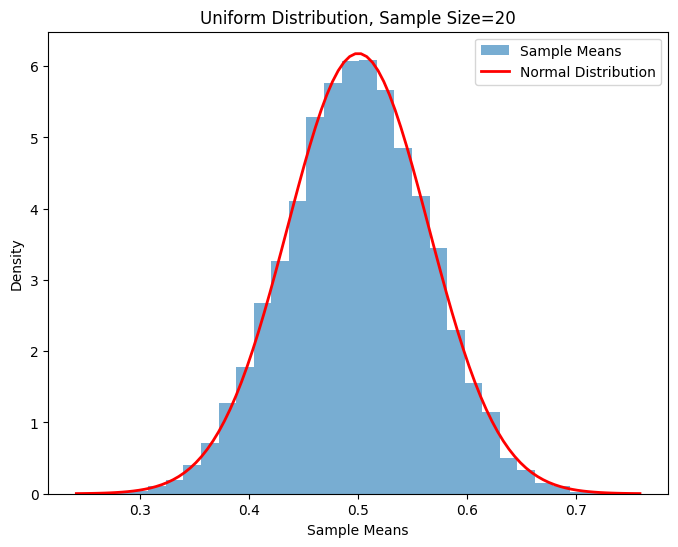

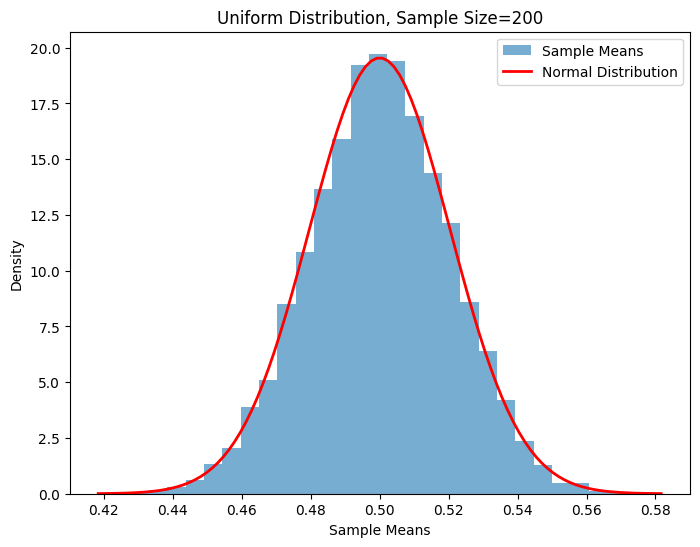

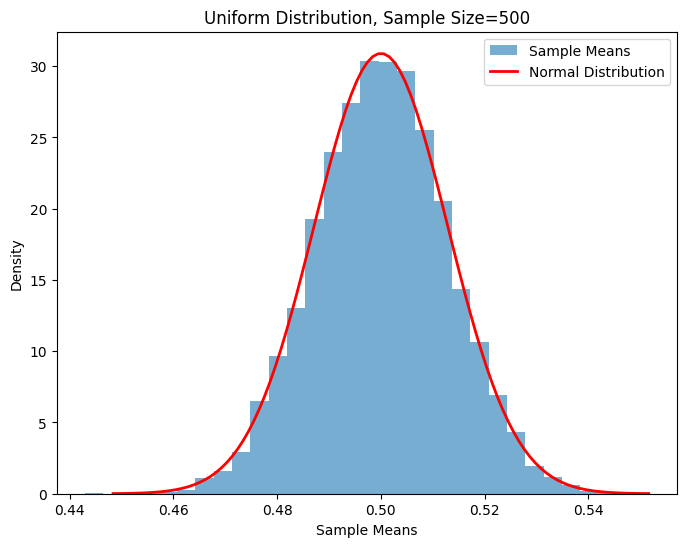

In [11]:
plotUniformDistribution(10000, 20)
plotUniformDistribution(10000, 200)
plotUniformDistribution(10000, 500)

### 2 - Binomial Distribution:

In [12]:
def plotBinomialDistribution(numberOfSamples, sampleSize):
    n = 100 
    p = 0.4
    samples = np.random.binomial(n, p, size=(numberOfSamples, sampleSize))
    sampleMeans = samples.mean(axis=1)
    plt.figure(figsize=(8, 6))
    plt.hist(sampleMeans, bins=30, density=True, alpha=0.6, label='Sample Means')
    mean = n * p
    std_dev = np.sqrt(n * p * (1 - p) / sampleSize)
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
    y = np.exp(-(x - mean)**2 / (2 * std_dev**2)) / (std_dev * np.sqrt(2 * np.pi))
    plt.plot(x, y, 'r-', lw=2, label='Normal Distribution')
    plt.title(f'Binomial Distribution (n={n}, p={p}), Sample Size={sampleSize}')
    plt.xlabel('Sample Means')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

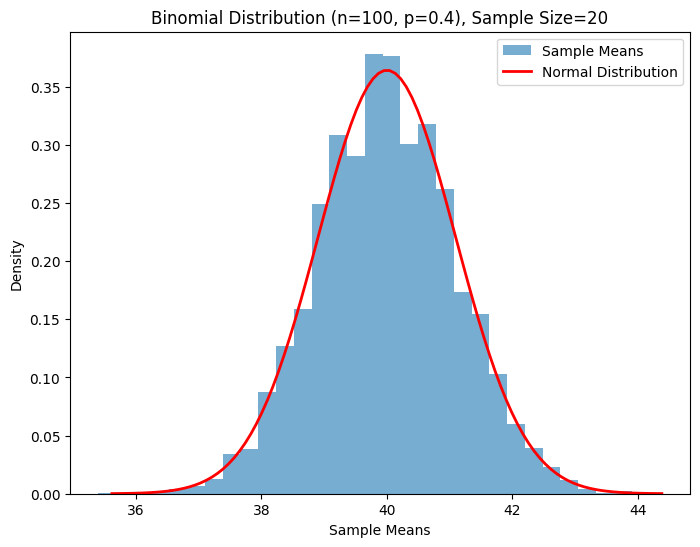

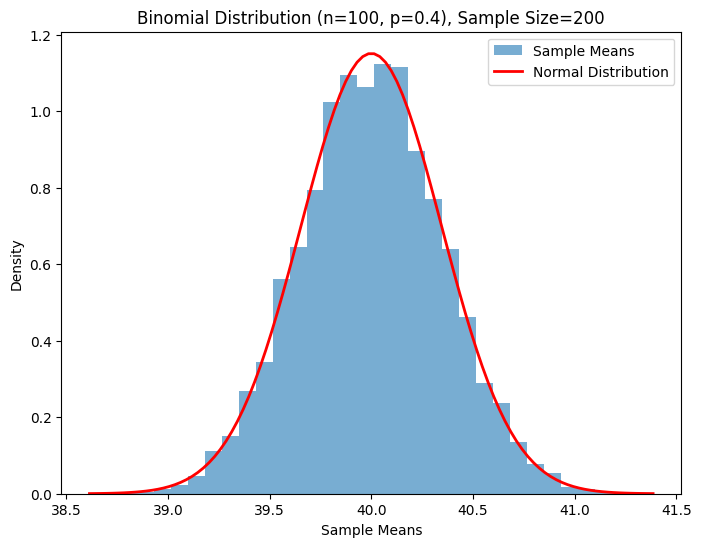

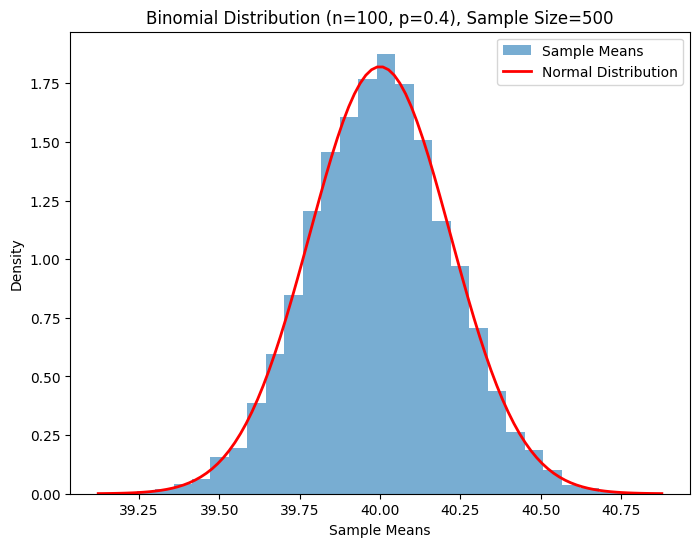

In [13]:
plotBinomialDistribution(10000, 20)
plotBinomialDistribution(10000, 200)
plotBinomialDistribution(10000, 500)

### 3 - Exponential Distribution:

In [14]:
def plotExponentialDistribution(numberOfSamples, sampleSize):
    lambdaSign = 2 
    samples = np.random.exponential(scale=1/lambdaSign, size=(numberOfSamples, sampleSize))
    sampleMeans = samples.mean(axis=1)
    plt.figure(figsize=(8, 6))
    plt.hist(sampleMeans, bins=30, density=True, alpha=0.6, label='Sample Means')
    mean = 1/lambdaSign
    std_dev = 1/(lambdaSign * np.sqrt(sampleSize))
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
    y = np.exp(-(x - mean)**2 / (2 * std_dev**2)) / (std_dev * np.sqrt(2 * np.pi))
    plt.plot(x, y, 'r-', lw=2, label='Normal Distribution')
    plt.title(f'Exponential Distribution (λ={lambdaSign}), Sample Size={sampleSize}')
    plt.xlabel('Sample Means')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

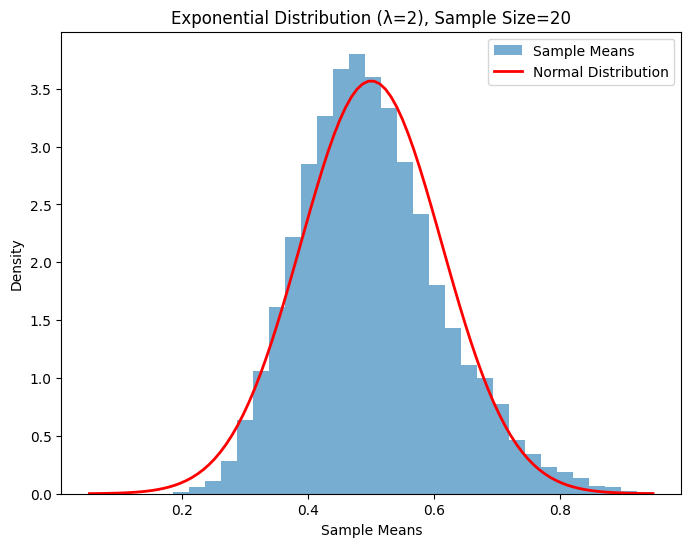

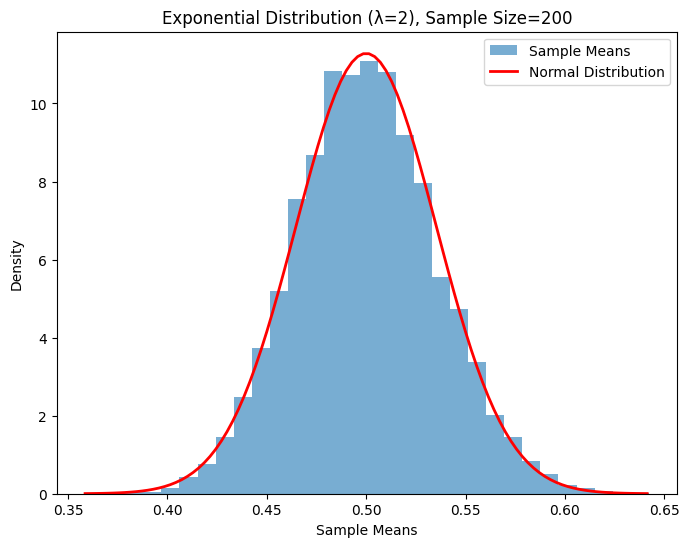

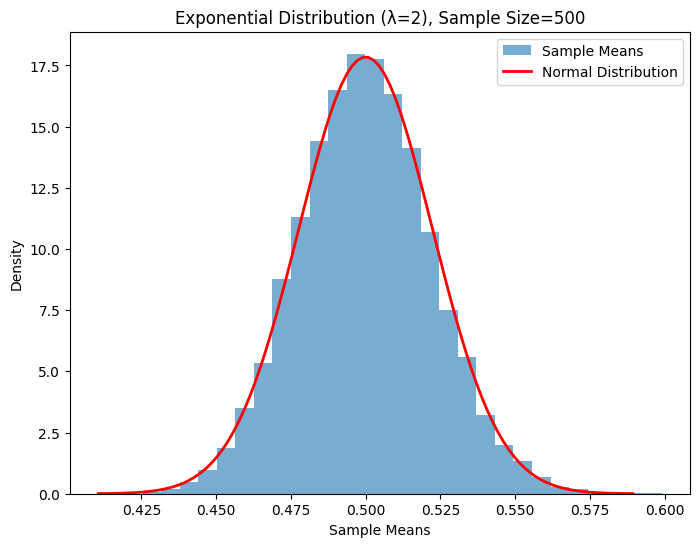

In [15]:
plotExponentialDistribution(10000, 20)
plotExponentialDistribution(10000, 200)
plotExponentialDistribution(10000, 500)

<span style="color:red">Result Analysis</span>: 

The experiments with the Uniform, Exponential, and Binomial distributions demonstrate the Central Limit Theorem in action. As the sample size increases, the distribution of sample means approaches a normal distribution, regardless of the underlying population distribution. 

For small sample sizes (e.g., 20), the histograms of sample means exhibit distinct shapes reflecting the original population distributions. However, as the sample size grows larger (200 and 500), the histograms of sample means converge to a bell-shaped normal curve, closely matching the expected normal distribution predicted by the Central Limit Theorem.

This convergence towards normality is observed consistently across all three chosen distributions, highlighting the robustness of the Central Limit Theorem.

## Hypothesis Testing:

### Unfair Coin:

In [16]:
def unfairCoinFlip():
    randomNum = random.random()
    if randomNum < 0.55:
        return 'H'
    else:
        return 'T'

In [17]:
def unfairCoinObserve(numberOfFlips):
    flips = [unfairCoinFlip() for _ in range(numberOfFlips)]
    numberOfHeads = flips.count('H')
    numberOfTails = numberOfFlips - numberOfHeads
    observedHeads = numberOfHeads / numberOfFlips
    print(f"Number of Flips: {numberOfFlips}")
    print(f"Number of Heads: {numberOfHeads}")
    print(f"Number of Tails: {numberOfTails}")
    print(f"Observed Frequency of Heads: {observedHeads:.4f}")
    return observedHeads

#### Confidence Interval Approach:

In [18]:
def confidenceIntervalApproach(numberOfFlips, observedHeads):
    standardError = math.sqrt(observedHeads * (1 - observedHeads) / numberOfFlips)
    zScore = 1.96 
    marginOfError = zScore * standardError
    lowerBound = observedHeads - marginOfError
    upperBound = observedHeads + marginOfError
    print(f"\n95% (z-score = 1.96) Confidence Interval: [{lowerBound:.4f}, {upperBound:.4f}]")
    if (0.5 < lowerBound) or (0.5 > upperBound):
        print("Coin is not Fair.(Confidence Interval)")
    else:
        print("Coin is Fair.(Confidence Interval)")

#### P-Value Approach:

In [28]:
def pValueApproach(numberOfFlips, observedHeads):
    standardError = math.sqrt(observedHeads * (1 - observedHeads) / numberOfFlips)
    expectedProbOfHeads = 0.5
    numberOfHeads = numberOfFlips * observedHeads
    pValue = binomtest(round(numberOfHeads), numberOfFlips, expectedProbOfHeads, alternative='two-sided')
    print(f"P-Value: {pValue.pvalue}")
    if pValue.pvalue < 0.05:
        print("Coin is not Fair. (P-Value)")
    else:
        print("Coin is Fair.(P-Value)")
    zScore = (observedHeads - expectedProbOfHeads) / standardError
    print(f"Z-score: {zScore:.4f}")

In [23]:
def hypothesisTesting(numberOfFlips):
    observedHeads = unfairCoinObserve(numberOfFlips)
    confidenceIntervalApproach(numberOfFlips, observedHeads)
    pValueApproach(numberOfFlips, observedHeads)

In [29]:
print("Sample Size 30:")
hypothesisTesting(30)

Sample Size 30:
Number of Flips: 30
Number of Heads: 17
Number of Tails: 13
Observed Frequency of Heads: 0.5667

95% (z-score = 1.96) Confidence Interval: [0.3893, 0.7440]
Coin is Fair.(Confidence Interval)
P-Value: 0.5846647117286922
Coin is Fair.(P-Value)
Z-score: 0.7369


<span style="color:red">Result Analysis</span>: 

With a sample size of 30, the hypothesis testing results are inconclusive and do not provide strong evidence to reject or accept the null hypothesis (fair coin).
The 95% confidence interval for the proportion of heads ranges from 0.4247 to 0.7753, which includes the expected value of 0.5 for a fair coin. Similarly, the p-value of 0.361595 is relatively large, failing to reject the null hypothesis at the 0.05 significance level.
However, the z-score of 1.1180 indicates that the observed proportion of heads (0.6) is slightly higher than the expected value of 0.5, which could be due to the small sample size and the variability associated with it.

In [30]:
print("\nSample Size 100:")
hypothesisTesting(100)


Sample Size 100:
Number of Flips: 100
Number of Heads: 53
Number of Tails: 47
Observed Frequency of Heads: 0.5300

95% (z-score = 1.96) Confidence Interval: [0.4322, 0.6278]
Coin is Fair.(Confidence Interval)
P-Value: 0.6172994135892521
Coin is Fair.(P-Value)
Z-score: 0.6011


<span style="color:red">Result Analysis</span>: 

With a sample size of 100, the hypothesis testing on the coin's fairness yields results that lean towards not rejecting the null hypothesis (fair coin). The 95% confidence interval for the proportion of heads is calculated to be from 0.3821 to 0.5779, which comfortably encompasses the 0.5 mark anticipated for an unbiased coin. The p-value, standing at 0.764353, is considerably high, further indicating that the null hypothesis cannot be rejected at the conventional 0.05 significance threshold.
Moreover, the z-score of -0.4003 reflects a minor deviation from the expected mean, suggesting that the observed proportion of heads (0.48) is very close to the hypothesized fair coin value of 0.5. This observation, combined with the confidence interval and p-value, points towards the coin being fair.

In [31]:
print("\nSample Size 1000:")
hypothesisTesting(1000)


Sample Size 1000:
Number of Flips: 1000
Number of Heads: 542
Number of Tails: 458
Observed Frequency of Heads: 0.5420

95% (z-score = 1.96) Confidence Interval: [0.5111, 0.5729]
Coin is not Fair.(Confidence Interval)
P-Value: 0.008639949002260493
Coin is not Fair. (P-Value)
Z-score: 2.6657


<span style="color:red">Result Analysis</span>: 

With a sample size of 1000, the analysis strongly suggests the coin is not fair. The observed heads frequency of 0.54 falls outside the 95% confidence interval of [0.5091, 0.5709], indicating a bias. This conclusion is supported by a low p-value of 0.012444, suggesting significant deviation from fairness. The z-score of 2.5380 further underscores this bias. These findings demonstrate that increasing the sample size enhances the ability to detect subtle biases in the coin's fairness.

## Job Placement:

In [32]:
dataFrame = pd.read_csv("job_placement.csv")
display(dataFrame)
dataFrame.describe()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
695,696,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,697,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,698,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,699,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


,id,age,salary,gpa,years_of_experience
count,700.00000,700.000000,700.000000,700.000000,699.000000
mean,350.50000,24.411429,52474.285714,3.750429,2.177396
std,202.21688,1.164268,25160.331005,0.121212,0.779393
min,1.00000,23.000000,0.000000,3.400000,1.000000
25%,175.75000,23.000000,61000.000000,3.700000,2.000000
50%,350.50000,24.000000,64000.000000,3.800000,2.000000
75%,525.25000,26.000000,66000.000000,3.900000,3.000000
max,700.00000,26.000000,68000.000000,3.900000,3.000000


In [33]:
jobPlacementDF = dataFrame[dataFrame['placement_status'] == 'Placed'].copy()
jobPlacementDF = jobPlacementDF.reset_index(drop=True)
notJobPlacementDF = dataFrame[dataFrame['placement_status'] == 'Not Placed'].copy()
notJobPlacementDF = notJobPlacementDF.reset_index(drop=True)

In [34]:
display(jobPlacementDF)
jobPlacementDF.describe()
display(notJobPlacementDF)
notJobPlacementDF.describe()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
4,6,Sarah Wilson,Female,25,Bachelor's,Electronics and Communication,Columbia University,Placed,63000,3.7,1.0
...,...,...,...,...,...,...,...,...,...,...,...
565,694,Alexander Lee,Male,26,Bachelor's,Information Technology,University of Michigan--Ann Arbor,Placed,67000,3.9,3.0
566,696,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
567,697,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
568,698,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0


,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
1,8,Emma Garcia,Female,24,Bachelor's,Computer Science,University of Chicago,Not Placed,0,3.6,2.0
2,12,Ava Lopez,Female,25,Bachelor's,Electronics and Communication,Johns Hopkins University,Not Placed,0,3.8,3.0
3,16,Isabella Perez,Female,25,Bachelor's,Mechanical Engineering,University of Virginia,Not Placed,0,3.7,2.0
4,22,Elizabeth Wood,Female,26,Bachelor's,Mechanical Engineering,University of Texas--Austin,Not Placed,0,3.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...
125,679,Liam Perez,Male,25,Bachelor's,Computer Science,University of Pennsylvania,Not Placed,0,3.7,2.0
126,684,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of North Carolina--Chapel Hill,Not Placed,0,3.6,1.0
127,689,Oliver Rodriguez,Male,23,Bachelor's,Computer Science,University of California--Riverside,Not Placed,0,3.9,2.0
128,695,Sophia Johnson,Female,24,Bachelor's,Mechanical Engineering,University of Pennsylvania,Not Placed,0,3.7,2.0


,id,age,salary,gpa,years_of_experience
count,130.000000,130.000000,130.0,130.000000,130.000000
mean,344.984615,24.353846,0.0,3.702308,1.646154
std,206.831916,1.119673,0.0,0.141676,0.540765
min,4.000000,23.000000,0.0,3.400000,1.000000
25%,162.250000,23.000000,0.0,3.600000,1.000000
50%,344.000000,24.000000,0.0,3.700000,2.000000
75%,523.500000,25.000000,0.0,3.900000,2.000000
max,700.000000,26.000000,0.0,3.900000,3.000000


In [35]:
jobPlacementGpa = jobPlacementDF["gpa"]
notJobPlacementGpa = notJobPlacementDF["gpa"]

The t-statistic for the two-sample t-test with unknown but equal variances is calculated using the following formula:

$$
t = \frac{(\bar{x}_1 - \bar{x}_2)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

Where:
- $\bar{x}_1$ is the mean grade of the working group
- $\bar{x}_2$ is the mean grade of the non-working group
- $s_1^2$ is the sample variance of the working group
- $s_2^2$ is the sample variance of the non-working group
- $n_1$ is the sample size of the working group
- $n_2$ is the sample size of the non-working group

The degrees of freedom (df) for the two-sample t-test with unknown but equal variances are calculated using the Welch-Satterthwaite approximation:

$$
df = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{(s_1^2/n_1)^2}{n_1-1} + \frac{(s_2^2/n_2)^2}{n_2-1}}
$$

To calculate the sample variance for each group, we can use the following formula:

$$
s^2 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}
$$

Where:
- $x_i$ are the individual data points (grades)
- $\bar{x}$ is the sample mean
- $n$ is the sample size

And the sample mean can be calculated as:

$$
\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n}
$$

In [36]:
def calculateMean(values):
    total = sum(values)
    n = len(values)
    return total / n

def calculateVariance(values, mean):
    squaredDiffs = [(x - mean) ** 2 for x in values]
    return sum(squaredDiffs) / (len(values) - 1)

def calculateTStatistic(x1, x2, n1, n2, s1, s2):
    numerator = x1 - x2
    denominator = math.sqrt((s1 ** 2 / n1) + (s2 ** 2 / n2))
    return numerator / denominator

def calculateDegreesOfFreedom(n1, n2, s1, s2):
    numerator = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2
    denominator = (s1 ** 2 / n1) ** 2 / (n1 - 1) + (s2 ** 2 / n2) ** 2 / (n2 - 1)
    return numerator / denominator

In [38]:
x1 = calculateMean(jobPlacementGpa)
x2 = calculateMean(notJobPlacementGpa)
n1 = len(jobPlacementGpa)
n2 = len(notJobPlacementGpa)
s1 = math.sqrt(calculateVariance(jobPlacementGpa, x1))
s2 = math.sqrt(calculateVariance(notJobPlacementGpa, x2))
tStatistic = calculateTStatistic(x1, x2, n1, n2, s1, s2)
degreesOfFreedom = calculateDegreesOfFreedom(n1, n2, s1, s2)
degreesOfFreedomSecondMethod = n1 + n2 - 2
print("T-Statistic: ", tStatistic)
print("Degrees of Freedom: ", degreesOfFreedom)
print("Degrees of Freedom (Second Method): ", degreesOfFreedomSecondMethod)

T-Statistic:  4.442633347555507
Degrees of Freedom:  168.60096176204104
Degrees of Freedom (Second Method):  698


In [39]:
pValue = 2 * t.sf(abs(tStatistic), degreesOfFreedom)
print(f"P-Value: {pValue:.6f}")

P-Value: 0.000016


### Result and Decision :

<span style="color:red">Result:</span>: 


The analysis strongly suggests that there is a significant impact of job placement on students' GPA. The high t-statistic and the exceedingly low p-value lead us to reject the null hypothesis, which posits no difference in GPA between students with and without job placements. This implies that job placement has a statistically significant effect on students' academic performance.


<span style="color:red">Decision:</span>: 


Based on the calculated t-statistic and p-value, the decision is to reject the null hypothesis. There is sufficient evidence to conclude that there is a significant difference in the GPAs of students working alongside their studies compared to those who are not.<span style="color:red">This analysis supports the belief that job placement while studying can negatively affect academic performance.</span>

In [45]:
t_statistic, p_value = ttest_ind(jobPlacementGpa, notJobPlacementGpa, equal_var=True)

print(f"T-Statistic: {t_statistic:.6f}")
print(f"P-Value: {p_value:.10f}")

n1 = len(jobPlacementGpa)
n2 = len(notJobPlacementGpa)
degrees_of_freedom = n1 + n2 - 2
print(f"Degrees of Freedom: {degrees_of_freedom}")

T-Statistic: 5.105319
P-Value: 0.0000004264
Degrees of Freedom: 698


### Compare Results :

While both approaches (manual calculations and using SciPy) lead to the rejection of the null hypothesis, indicating that job placement significantly affects students' GPAs, the SciPy results provide a stronger statistical indication of this effect. The differences in T-Statistic and P-Value between the two methods underscore the importance of understanding how degrees of freedom and other statistical parameters are calculated, as they can influence the interpretation of hypothesis testing outcomes. Nonetheless, the consistency in the overall decision across both methods reinforces the conclusion that working alongside studying negatively impacts students' academic performance.

## Questions :

1\. **Read a little bit about the applications of Monte Carlo Simulation in real life. What are some of these applications?**
- Finance: Monte Carlo simulations are widely used for risk analysis, portfolio optimization, option pricing, and asset valuation.
- Manufacturing and Operations: They are employed for optimizing production schedules, supply chain management, and inventory control.
- Engineering: Monte Carlo simulations are utilized for structural analysis, reliability analysis, and design optimization in fields such as civil, mechanical, and aerospace engineering.
- Environmental Modeling: They are used for predicting the spread of pollutants, analyzing groundwater flow, and modeling climate change scenarios.
- Healthcare: Monte Carlo simulations are applied in radiation therapy planning, risk assessment for medical procedures, and modeling disease spread.

2\. **How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots?**

As the sample size increases, the plots illustrating the Central Limit Theorem typically exhibit the following behavior:
- The shape of the distribution becomes more bell-shaped and approaches a normal distribution.
- The sampling distribution of the means becomes more concentrated around the true population mean.
- The variability or spread of the sampling distribution decreases, as indicated by a smaller standard deviation.
These plots demonstrate that as the sample size increases, the sampling distribution of the means becomes more precise and accurately represents the population mean, regardless of the underlying distribution of the original data.

3\. **How does increasing the sample size affect your coin test?**

Increasing the sample size (the number of coin flips) in the coin test has the following effects:
- The observed proportion of heads converges closer to the expected probability (0.55) as the sample size grows larger.
- The variation or fluctuations in the observed proportion decrease, leading to a more stable and accurate estimate of the true probability.
- The confidence interval around the observed proportion becomes narrower, providing a more precise estimate of the true probability.
With larger sample sizes, the coin test becomes more reliable and provides a better representation of the underlying probability distribution.

4\. **What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?**

- **t-statistic**: The t-statistic measures how many standard deviations the difference between the two group means (placed and not placed students' GPAs) is away from zero. A larger t-statistic indicates a bigger difference between the groups.

- **Degrees of freedom**: Degrees of freedom refer to the number of independent values or observations that can vary in a statistical calculation. In the t-test, the degrees of freedom are related to the sample size and help determine the appropriate t-distribution for calculating probabilities.

- **t-distribution**: The t-distribution is used when the population standard deviation is unknown and the sample size is small. It has heavier tails than the normal distribution, accounting for increased uncertainty from small samples.

These components of the t-test help us compare two data sets by providing a framework for evaluating the significance of the difference between their means, taking into account the sample sizes and variability within the data.

5\. **What are the preliminary conditions for using t-test on our data?**

Before applying the t-test to compare two data sets, certain preliminary conditions should be met:

- **Normality**: The data in each group should be approximately normally distributed, or the sample sizes should be sufficiently large to invoke the Central Limit Theorem.
- **Independence**: The observations within each group should be independent of one another.
- **Homogeneity of variances**: The variances of the two groups being compared should be approximately equal.

If these conditions are violated, alternative non-parametric tests or transformations may be required to ensure the validity of the t-test results.

6\. **Read about some other types of tests that are used in scientific research. Write a line about each of them.**

- **ANOVA (Analysis of Variance)**: Used to compare means across three or more groups or conditions.
- **Chi-square test**: Evaluates the relationship between categorical variables or tests the goodness-of-fit of a distribution.
- **Regression analysis**: Models the relationship between a dependent variable and one or more independent variables.
- **Non-parametric tests**: Used when the assumptions of parametric tests are violated or for ordinal/ranked data.
- **Correlation analysis**: Measures the strength and direction of the linear relationship between two variables.
- **Survival analysis**: Analyzes the time until an event occurs, accounting for censored data.
- **Factor analysis**: Explores the underlying structure of a set of variables and identifies latent factors.
- **Cluster analysis**: Groups observations into clusters based on their similarities or distances.